In [14]:
# Helpful packages for working with images and factorizations
# using Pkg; Pkg.add("Images")
# using Pkg; Pkg.add("ImageMagick") # And this allows us to load JPEG-encoded images
using Images, LinearAlgebra, Interact

### Using a SVD to compress an image

In this exercise, we'll use a singular value decomposition (SVD) to compress an image -- so that we can store an image without keeping around "unnecessary" information.

To start, let's define a singular value decomposition. In a SVD, we take a matrix $A$ and factorize it so that

$$A = USV^T$$

where matrices $U$ and $V$ are unitary and hold our singular vectors. Matrix $S$ is diagonal and stores our singular values in decreasing order from top/left to bottom/right.

In Julia, our images are stored as arrays, so we can think of `yellowbanana` as a matrix

In [15]:
file = download("https://uploads6.wikiart.org/images/salvador-dali/the-persistence-of-memory-1931.jpg!Large.jpg")

"C:\\Users\\akshu\\AppData\\Local\\Temp\\jl_ACrJGh0irh"

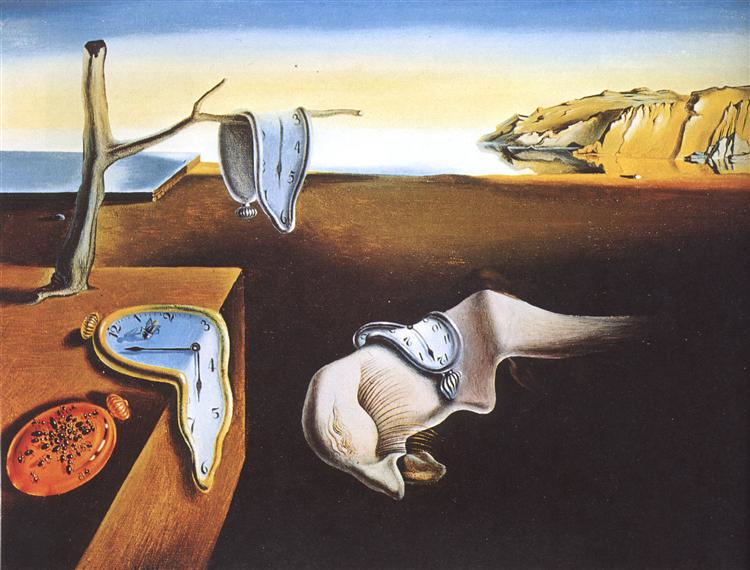

In [16]:
img = load(file)

In [17]:
size(img)

(570, 750)

In [18]:
img[24,24] # Each element in the array is a color

In [19]:
dump(img[24,24])

RGB{Normed{UInt8,8}}
  r: Normed{UInt8,8}
    i: UInt8 0x8a
  g: Normed{UInt8,8}
    i: UInt8 0xa4
  b: Normed{UInt8,8}
    i: UInt8 0xc5


We can extract each "channel" of red, green, and blue and view each independently:

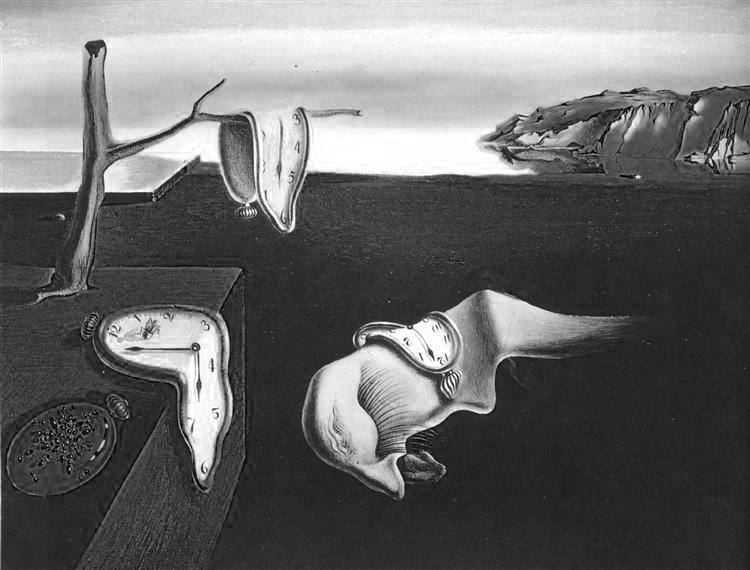

In [29]:
channels = Float64.(channelview(img))
Gray.(channels[3, :, :])

That means we can take the SVD of this image. So, we can store this picture of a banana as sets of singular vectors and singular values.

**The reason this is important** is that we'll find that we do **not** need to keep track of *all* the singular vectors and *all* the singular values to store an image that still looks like a banana! This means we can choose to keep only the important information, throw away the rest, and thereby "compress" the image.

If we don't throw away any data, we get back what we started with:

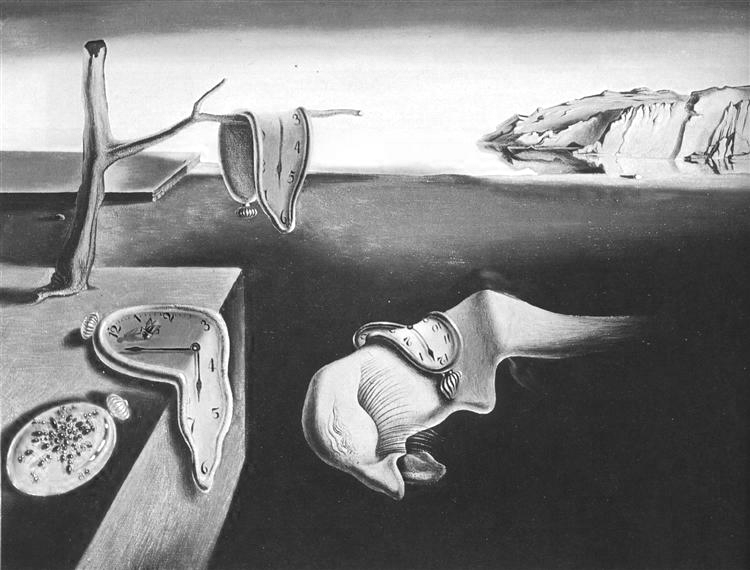

In [21]:
U, S, V = svd(channels[1,:,:])
Gray.(U * Diagonal(S) * V')

But of course we're not doing any compression here — the sizes of U, S, and V are bigger than our original matrix! This is like the opposite of compression.  The key is that the values are stored in decreasing order so we can start throwing things away.

In [22]:
sum(length.((U, S, V)))

752970

In [23]:
length(img)

427500

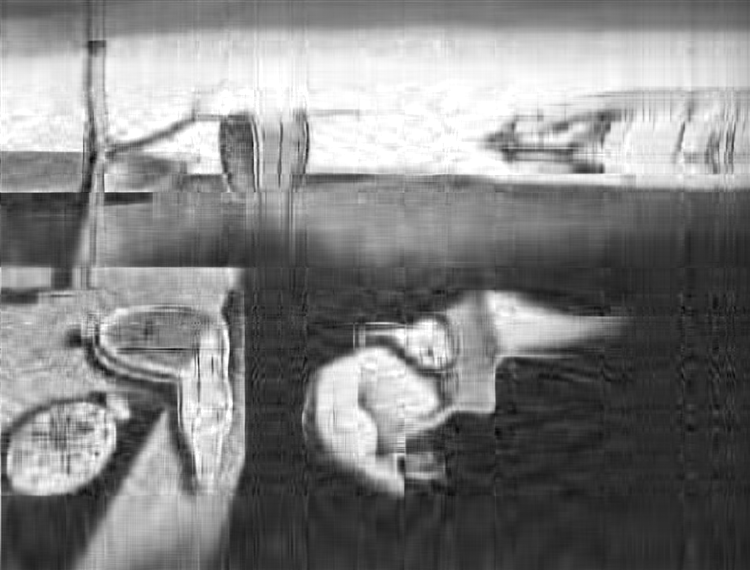

In [24]:
Gray.(U[:, 1:25] * Diagonal(S[1:25]) * V[:, 1:25]')

In [25]:
sum(length.((U[:, 1:25], S[1:25], V[:, 1:25])))/length(img)

0.0772514619883041

Of course this is just one channel of the image. Let's put it all back together and see how we can compress the different channels to find an acceptable compression level.

In [30]:
function rank_approx(M, k)
    U, S, V = svd(M)
    
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    
    M = min.(max.(M, 0.0), 1.)
end

n = 100
@manipulate for k1 in 1:n, k2 in 1:n, k3 in 1:n
    colorview(  RGB, 
                rank_approx(channels[1,:,:], k1),
                rank_approx(channels[2,:,:], k2),
                rank_approx(channels[3,:,:], k3)
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\akshu\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\akshu\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\akshu\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\akshu\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\akshu\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000013541fb0, Task (runnable) @0x0000000013541fb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\"

**So how can we use a SVD to determine what information in an image is really important?**

The singular values tell us!

If we have matrices $U$, $S$, and $V$ from our image, we can rebuild that image with the matrix product $USV^T$. 

Taking this matrix product is the same as adding together the outer products of each corresponding pair of vectors from $U$ and $V$, scaled by a singular value ($\sigma$) from $S$. In other words, for a (100 x 100) pixel image,

$$A_{image} = USV^T = \sum_{i = 1}^{100} \sigma_i \mathbf{u_i}\mathbf{v_i'} $$

Every outer product $u_i * v_i'$ creates a (100 x 100) matrix. Here we're summing together one hundred (100 x 100) matrices in order to create the original matrix $A_{image}$. The matrices at the beginning of the series -- those that are scaled by **large** singular values -- will be **much** more important in recreating the original matrix $A_{image}$.

This means we can approximate $A_{image}$ as

$$A_{image} \approx \sum_{i = 1}^{n} \sigma_i \mathbf{u_i}\mathbf{v_i'}$$

where $n < 100$.


#### Exercise

Write a function called `compress_image`. Its input arguments should be an image and the factor by which you want to compress the image. A compressed grayscale image should display when `compress_image` is called.

For example,

```julia
compress_image("images/104_100.jpg", 33)
```

will return a compressed image of a grayscale banana built using 3 singular values. (This image has 100 singular values, so use `fld(100, 33)` to determine how many singular values to keep. `fld` performs "floor" division.)

*Hints*: 

* Perform the SVD on the `channelview` of a grayscale image.
* In an empty input cell, execute `?svd` to find a function that wil perform an SVD for you.